> Workshop LabCity
# Processamento de Imagens com Python e OpenCV
## Parte 3: Transformações Geométricas

As transformações geométricas em OpenCV são usadas para alterar a posição, o tamanho, a orientação ou a forma de uma imagem. Isso é fundamental em tarefas de visão computacional, como o ajuste de perspectiva, rotação de imagens e alinhamento de objetos.

1. Redimensionamento
   1. Extra: Somando Imagens
2. Warp Perspective

---
## Importando as bibliotecas necessárias

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

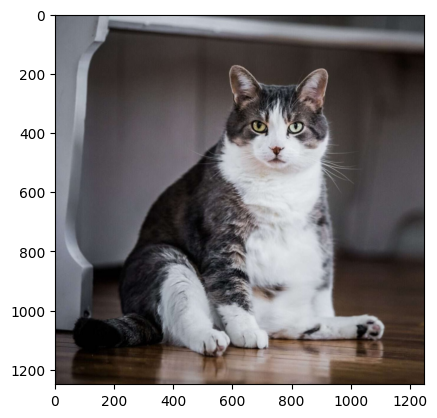

In [3]:
path = "media/gatogordo.jpg"  # Define o caminho da imagem de exemplo

# Carregar a imagem e converter para RGB
imagem = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
plt.imshow(imagem)

---
## Redimensionamento

O redimensionamento altera o tamanho da imagem, aumentando ou reduzindo sua largura e altura.

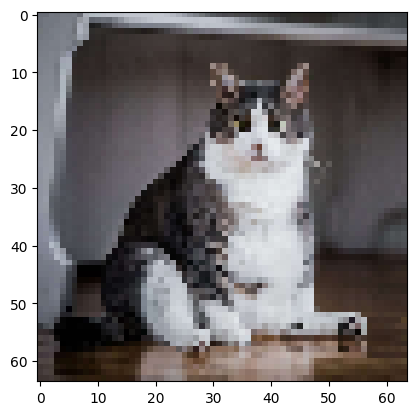

In [4]:
# Utilize a função cv2.resize para redimensionar a imagem
imagem_redim = cv2.resize(imagem, (64, 64))

# Exiba a imagem redimensionada
plt.imshow(imagem_redim)

## Extra: Somando Imagens

 Operações entre imagens diferentes pode ser útil em vários cenários. Um deles é para a inclusão de marca d'água em imagens.

 Vamos inserir o logo da UFPA como marca d'água na imagem do gato gordo!

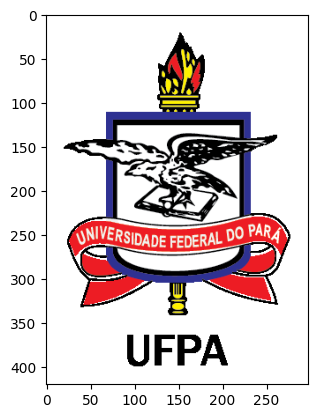

In [5]:
# Carregar o logo da UFPA e converter para RGB
logo = cv2.cvtColor(cv2.imread("media/logo.png"), cv2.COLOR_BGR2RGB)

# Exibir o logo da UFPA
plt.imshow(logo)

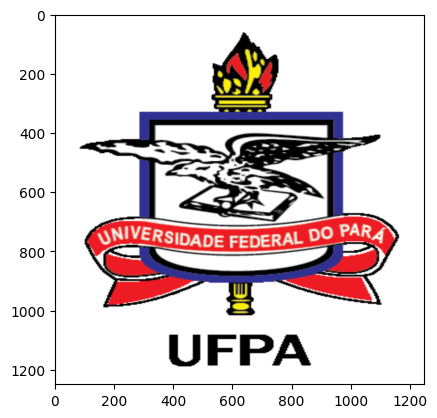

In [6]:
# Precisamos redimensionar o logo para que ele tenha o mesmo tamanho da imagem
logo_redim = cv2.resize(logo, (1250, 1250))

# Exibir o logo redimensionado
plt.imshow(logo_redim)

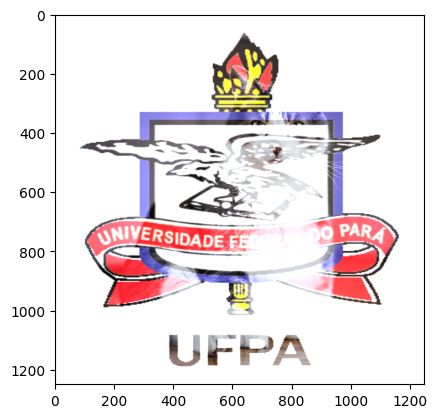

In [17]:
# Somar as duas imagens
soma = cv2.add(imagem, logo_redim)

# Exibir a imagem resultante
plt.imshow(soma)

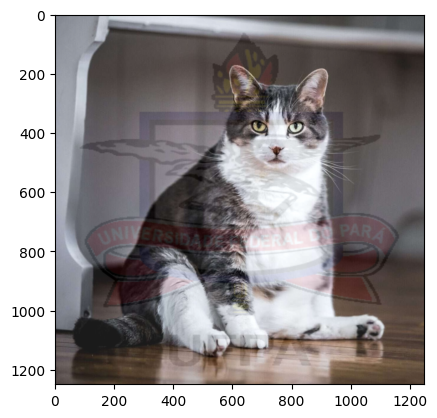

In [18]:
# Usar a soma ponderada cv2.addWeighted para combinar as imagens
soma_ponderada = cv2.addWeighted(
    src1=imagem, alpha=1, src2=logo_redim, beta=0.10, gamma=0
)

# Exibir a imagem
plt.imshow(soma_ponderada)

---
### Warp Perspective

Muitas vezes o objeto de interesse não está sendo visto diretamente na imagem, dificultando o seu processamento. A transformação de perspectiva é uma boa solução para simular o ponto de vista ideal do objeto.

Para ilustrar esta transformação, utilizaremos o Dragão Branco de Olhos Azuis! `media/dragon.png`

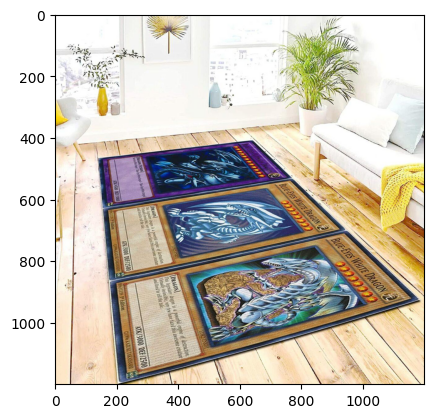

In [19]:
# Carregar a imagem do Dragão Branco de Olhos Azuis e converter para RGB
dragon = cv2.cvtColor(cv2.imread("media/dragon.jpg"), cv2.COLOR_BGR2RGB)

# Exibir a imagem
plt.imshow(dragon)

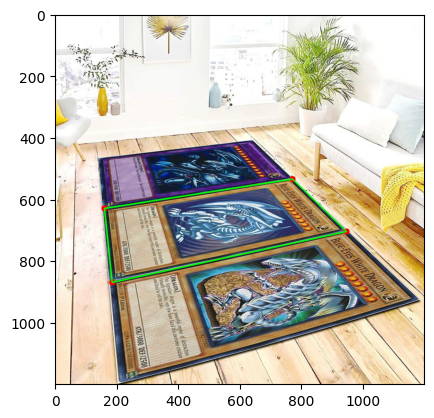

In [21]:
# Estimando a posição dos pontos de origem
pontos = dragon.copy()

# Procurando a posição do Ponto 1
ponto1 = (770, 535)
cv2.circle(pontos, ponto1, 10, (255, 0, 0), -1)

# Procurando a posição do Ponto 2
ponto2 = (945, 705)
cv2.circle(pontos, ponto2, 10, (255, 0, 0), -1)

# Procurando a posição do Ponto 3
ponto3 = (160, 630)
cv2.circle(pontos, ponto3, 10, (255, 0, 0), -1)

# Procurando a posição do Ponto 4
ponto4 = (185, 870)
cv2.circle(pontos, ponto4, 10, (255, 0, 0), -1)

# Conectando os pontos, para visualização
cv2.line(pontos, ponto1, ponto2, (0, 255, 0), 3)
cv2.line(pontos, ponto2, ponto4, (0, 255, 0), 3)
cv2.line(pontos, ponto4, ponto3, (0, 255, 0), 3)
cv2.line(pontos, ponto3, ponto1, (0, 255, 0), 3)

# Transformando os pontos em um array do numpy
pontos_origem = np.float32([ponto1, ponto2, ponto3, ponto4])

# Exibindo a imagem com os pontos conectados
plt.imshow(pontos)

In [12]:
# Definir os quatro pontos de destino para transformar a perspectiva
# A imagem resultante terá os cantos retangulares, como uma visão aérea
width, height = 250, 400  # Definir o tamanho do resultado
pontos_destino = np.float32([[0, 0], [width, 0], [0, height], [width, height]])

In [13]:
# Obter a matriz de transformação de perspectiva
matriz = cv2.getPerspectiveTransform(pontos_origem, pontos_destino)

# Realizar a transformação de perspectiva
carta = cv2.warpPerspective(dragon, matriz, (width, height))

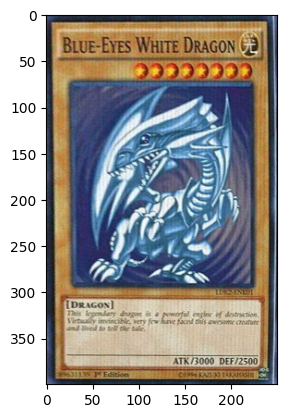

In [14]:
# Exibir a imagem resultante
plt.imshow(carta)